In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing

# Modeling

In [6]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics



In [7]:
X = df.drop('target',axis=1).values
Y = df['target'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
#rf = RandomForestClassifier(random_state=50)
#rf.fit(X_train,Y_train)
#Y_pred_rf = rf.predict(X_test)
#score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
#score_rf
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:52:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.97

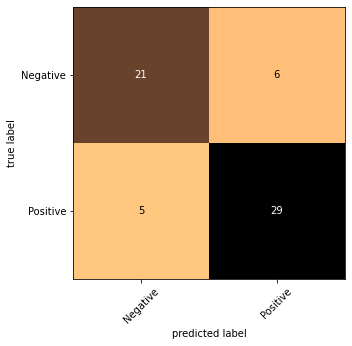

In [9]:
#conf_mat=confusion_matrix(Y_test,Y_pred_rf)
#plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='cividis_r'); #fn
#plt.savefig("RFcrr.png")
conf_mat=confusion_matrix(Y_test,Y_pred_xgb)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("GNBcrr.png")

In [11]:
#Y_pred_rf = np.around(Y_pred_rf)
#print(metrics.classification_report(Y_test,Y_pred_rf))
Y_pred_xgb = np.around(Y_pred_xgb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



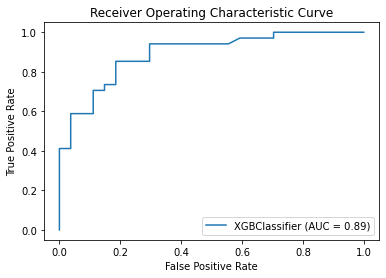

In [12]:
plot_roc_curve(xgb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
#plt.savefig("RF.png")

In [14]:
Input = (63, 1, 3,145,233,1,0,150, 0, 2.3,0,0,1)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = xgb.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease ")


[1]
The Person will has a Heart Disease 


In [16]:
   import pickle
with open('modelsxgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)